In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib notebook
# %matplotlib ipympl % visual studio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm import tqdm

In [2]:
def f(x):
   # return (x-1)**2
    return x**2 + 10*np.sin(x)
    #return x**4 - 2*x**2 -20*x -6

In [3]:
Dx = lambda f,x,h=1e-5: (f(x+h) - f(x-h))/(2*h)

In [4]:
_x = np.linspace(-10,10,50)
F = f(_x)

In [5]:
def Minimizer(f, N=200, gamma=0.01):
    
    r = np.zeros(N)
    # Seed
    r[0] = np.random.uniform(-5,5)
    
    for i in tqdm(range(1,N)):
        r[i] = r[i-1] - gamma*Dx(f,r[i-1])
        
    return r

In [6]:
x = Minimizer(f)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 199/199 [00:00<00:00, 347054.68it/s]


In [7]:
# Definimos la funcion de costo
Cost = f(x)

In [8]:
x[-1]

-1.3064400083797443

In [9]:
# Ultimo valor
Cost[-1]

-7.945823375615284

<IPython.core.display.Javascript object>


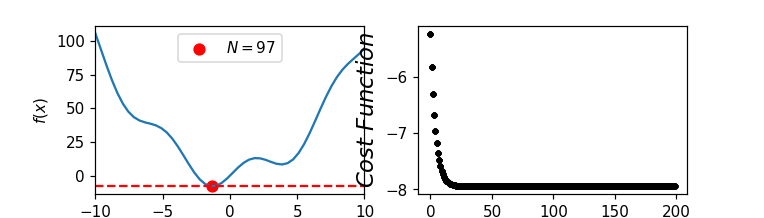

In [12]:
fig = plt.figure(figsize=(7,2))
ax = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

def init():
    
    ax.set_xlim(_x[0],_x[-1])
    
    ax.set_xlabel(r'$x$',fontsize=10)
    ax.set_ylabel(r'$f(x)$',fontsize=10)
    
    ax1.set_xlabel(r'$N$',fontsize=10)
    ax1.set_ylabel(r'$Cost \ Function$',fontsize=15)
    
def Update(i):
    
    ax.clear()
    init()
    ax.plot(_x,f(_x))
    ax.axhline(y=f(x[i]),ls='--',color='r')
    ax.scatter(x[i],f(x[i]), marker='o',color='r', label=r'$N=%.0f$'%(i),s=50)                 
    ax1.scatter(i,Cost[i],marker='.',color='k')                  
    
    ax.legend()

Animation = animation.FuncAnimation(fig, Update, frames=len(x),init_func=init)

In [11]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=2, metadata=dict(artist='Me'), bitrate=1800 )
#Animation.save( 'Gradient1D.mp4', writer=writer )